# The Smith Parasite Project <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Data Description__</font><br>

##### Business Problem
Who are the most likely people to get infected from the Smith Parasite

##### Datasets and Common Attributes

test_demo & train_demo
1. PatientID
2. Name
3. Birth_Year	
4. Region	
5. Education

test_habits & train_habits
1. PatientID	
2. Smoking_Habit	
3. Drinking_Habit	
4. Exercise	
5. Fruit_Habit	
6. Water_Habit

test_health & train_health
1. PatientID	
2. Height	
3. Weight	
4. High_Cholesterol	
5. Blood_Pressure	
6. Mental_Health	
7. Physical_Health	
8. Checkup	
9. Diabetes

Train datasets have the same attributes as Test dataset while also having the training column - Disease.




##### Questions


Suppositions about data:
1. Do people with lower Education have a HIGHER likelihood of getting the disease? 
2. Do people in certain regions (isolated, less populated, less educated...)  have a HIGHER likelihood of getting the disease? 
3. Do people who do exercise less often have HIGHER chances of the disease?
4. Do smoker have a HIGHER chance of contracting the disease?
5. Do people who don't do checkups have a HIGHER chance of getting the disease?
6. Do older people have a HIGHER chance?
7. Do people with lower Physical Health have a HIGHER chance of getting the disease?
8. Do people with healthier Weight tend to not contract the disease?
9. Do people who drink more have HIGHER chance?
10. Do people who eat more fruit have a HIGHER chance?

##### Tasks

1. Data Cleaning
2. Data Description
3. Preprocessing
4. Description Analysis (such as Ranking of Attributes linear, non-linear)
5. Feature Engineering that represents the likelihood of getting the disease
6. Modelling - Algorithms
7. Assessment - such as F1 score
8. Deploy

##### Solution Planning - Deliverables
1. Kaggle Competition
2. Notebook - Organize, Comment, Report Quality, Storytelling, deliver in PDF.


#### Features
- __PatientID__ - The unique identifier of the patient <p>
- __Name__ - The name of the patient <p>
- __Birth Year__ - Patient Year of Birth <p>
- __Region__ - Patient Living Region <p>
- __Education__ - What is the highest grade or year of school you have? <p>
- __Disease__ - If the patient has the disease (Disease = 1) or not (Disease = 0) <p>
- __Smoking Habit__ - Do you smoke more than 10 cigars daily? <p>
- __Drinking Habit__ - What is your behavior concerning alcohol consumption? <p>
- __Exercise__ - Do you exercise (more than 30 minutes) 3 times per week or more? <p>
- __Fruit Habit__ - How many portions of fruits do you consume per day? <p>
- __Water Habit__ - How much water do you drink per day? <p>
- __Height__ - Patient’s height <p>
- __Weight__ - Patient’s weight <p>
- __High Cholesterol__ - Cholesterol value <p>
- __Blood Pressure__ - Blood Pressure in rest value <p>
- __Mental Health__ - During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? <p>
- __Physical Health__ - Thinking about your physical health, which includes physical illness and injury, for how many days during he past 30 days was your physical health not good to the point where it was difficult to walk?  <p>
- __Checkup__ - How long has it been since you last visited a doctor for a routine Checkup? <p>
- __Diabetes__ - (Ever told) you or your direct relatives have diabetes?

### 📋 Index

> #### 1. Data Collection
> #### 2. Data Description
> #### 3. Data Quality Verification
> #### 4. Data Preparation
>> #### 4.1 Handling Duplicate and Missing Values
>> #### 4.2 Handling Outliers
>>> #### 4.2.1 Z-Score Approach 
>>> #### 4.2.2 IQR Method Approach
> #### 5. Feature Selection

In [1]:
## Ultima divisao   --DEADLINE 23 DEZ--

'''
DANIEL - justificar escolha modelos
CAROL - exploração + inicio relatorio
ANA CAROL - exploração + inicio relatorio
RAFAEL - justificar escolha modelos
TOMAS - chi-squared
'''

'\nDANIEL - justificar escolha modelos\nCAROL - exploração + inicio relatorio\nANA CAROL - exploração + inicio relatorio\nRAFAEL - justificar escolha modelos\nTOMAS - chi-squared\n'

### <font color='SeaGreen'> 1. Data Collection </font>
Libraries, data file path, and importing of the data

In [2]:
# magic commands
%autosave 90
%matplotlib inline

# libraries
import os
import glob
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from sklearn.svm import SVC
from sklearn import metrics
import scipy.stats as stats
from datetime import datetime
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.classifier import ROCAUC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold , RepeatedKFold, KFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# ignoring warnings
warnings.filterwarnings('ignore')

In [39]:
current_path = os.getcwd() # current directory (dir)
path = os.path.join(current_path, 'the-smith-parasite-dataset') # joins data folder dir

data_files = glob.glob(path + '/*xlsx') # gets excel files in folder

# creating lists with training an test data
train = []
test = []

for data in data_files: 
    if 'train' in data:
        train.append(pd.read_excel(data)) 
    else: 
        test.append(pd.read_excel(data))

# setting Patient ID as index in all dataframes 
for data_idx in range(len(train)): #
    train[data_idx] = train[data_idx].set_index('PatientID')
    test[data_idx] = test[data_idx].set_index('PatientID')

# merging data with Patient ID as key
train_data = pd.concat(train, axis=1)

test_data = pd.concat(test, axis=1)

# checking data import
display(train_data.head(2),test_data.head(2))

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   
1805                     0           Not sure   

                                                   Diabetes  \
PatientID                                                     
1167       Neither I nor my immediate family have diabetes.   
1805       Neither I nor my immediate family have diabetes.   

                         Name  Birth_Year      Region  \
PatientID                                               
1167       Mrs. Stephanie Gay        1965      London   
1805         Mr. Sherman Nero        1969  South West   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       High School Incomplete (10th to 11th grade)        1            No   
1805       High School Incomplete (10th to 11th grade)        1            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   

                                Water_Habit  
PatientID                                    
1167       Between one liter and two liters  
1805       Between one liter and two liters

Name  Birth_Year                    Region  \
PatientID                                                                
1343         Mr. Ricardo Sherman        1970             East Midlands   
1727       Mr. Jessie Strickland        1966  Yorkshire and the Humber   

                                       Education Smoking_Habit  \
PatientID                                                        
1343        Elementary School (1st to 9th grade)           Yes   
1727       University Complete (3 or more years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1343       I usually consume alcohol every day       No   
1727        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1343       Less than 1. I do not consume fruits every day.   
1727       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1343                     Between one liter and two liters     172      80   
1727       More than half a liter but less than one liter     171      80   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1343                    203             172             20                2   
1727                    225             130             21                0   

            Checkup                                           Diabetes  
PatientID                                                               
1343       Not sure  I have/had pregnancy diabetes or borderline di...  
1727       Not sure                                 I do have diabetes

### <font color='SeaGreen'>2. Data Description </font>

The __Data Description__ Phase aims to preliminarily understand the structure of the data, this process will allow us to get familiarized with the data and have some first impressions of patterns and relations, errors and associated changes.

The Data Description is composed by 4 steps:
1. Data Collection - To understand the location of the data files, their format, and import them to the project.
2. Data Description - Describing the structure of the tables imported in step 1, i.e number of rows, columns, datatypes; as well as showcasing some values
3. Data Exploration - Exploring the data with some high-level aggregate statistical analysis, to have a preliminary understanding of patterns and start hypothesizing about how the attributes relate.
4. Data Quality Verification - Identifying errors in data values, such as inconsistent types, duplicate rows, and missing values

Sample displaying, merging the tables into one and description with count(), info() and describe() methods

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Height            800 non-null    int64 
 1   Weight            800 non-null    int64 
 2   High_Cholesterol  800 non-null    int64 
 3   Blood_Pressure    800 non-null    int64 
 4   Mental_Health     800 non-null    int64 
 5   Physical_Health   800 non-null    int64 
 6   Checkup           800 non-null    object
 7   Diabetes          800 non-null    object
 8   Name              800 non-null    object
 9   Birth_Year        800 non-null    int64 
 10  Region            800 non-null    object
 11  Education         787 non-null    object
 12  Disease           800 non-null    int64 
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

__Notes:__

> 1 - There are __10296 rows__ (Customers) and __all features except Education Degree are numerical__ <p>
> 2 - There are __9 columns with missing values__

In [5]:
train_data.describe().T

count        mean        std     min      25%     50%  \
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   

                     75%     max  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0

In [6]:
train_data.describe(include='O').T

#There is one repeated name
#There are rows without Education data

count unique                                               top  \
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   

               freq  
Checkup         429  
Diabetes        392  
Name              2  
Region          154  
Education       239  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364

__Notes:__

> 1 - __First Policy Year__, __Gross monthly salary (€)__, __Customer Monetary Value__, __Premiums (€) in LOB: Motor__ and __Premiums (€) in LOB: Health__ all have unrealistically high maximum values<p>
> 2 - __Birth Year__ and __Customer Monetary Value__  all have unrealistically low minimum values<p>
> 3 - There are __more Customers with children__ than those without (mean higher that .5)<p>
> 4 - __Premiums (€) in LOB: Household__ are generally higher than the other Policy types and __Premiums (€) in LOB: Life__ are typically lower<p>
> 5 - Most Customers __have a Bachelor or a Masters degree__

### <font color='SeaGreen'>3. Data Exploration </font>
Correlations with data, plotting of correlations, hypothesizing.

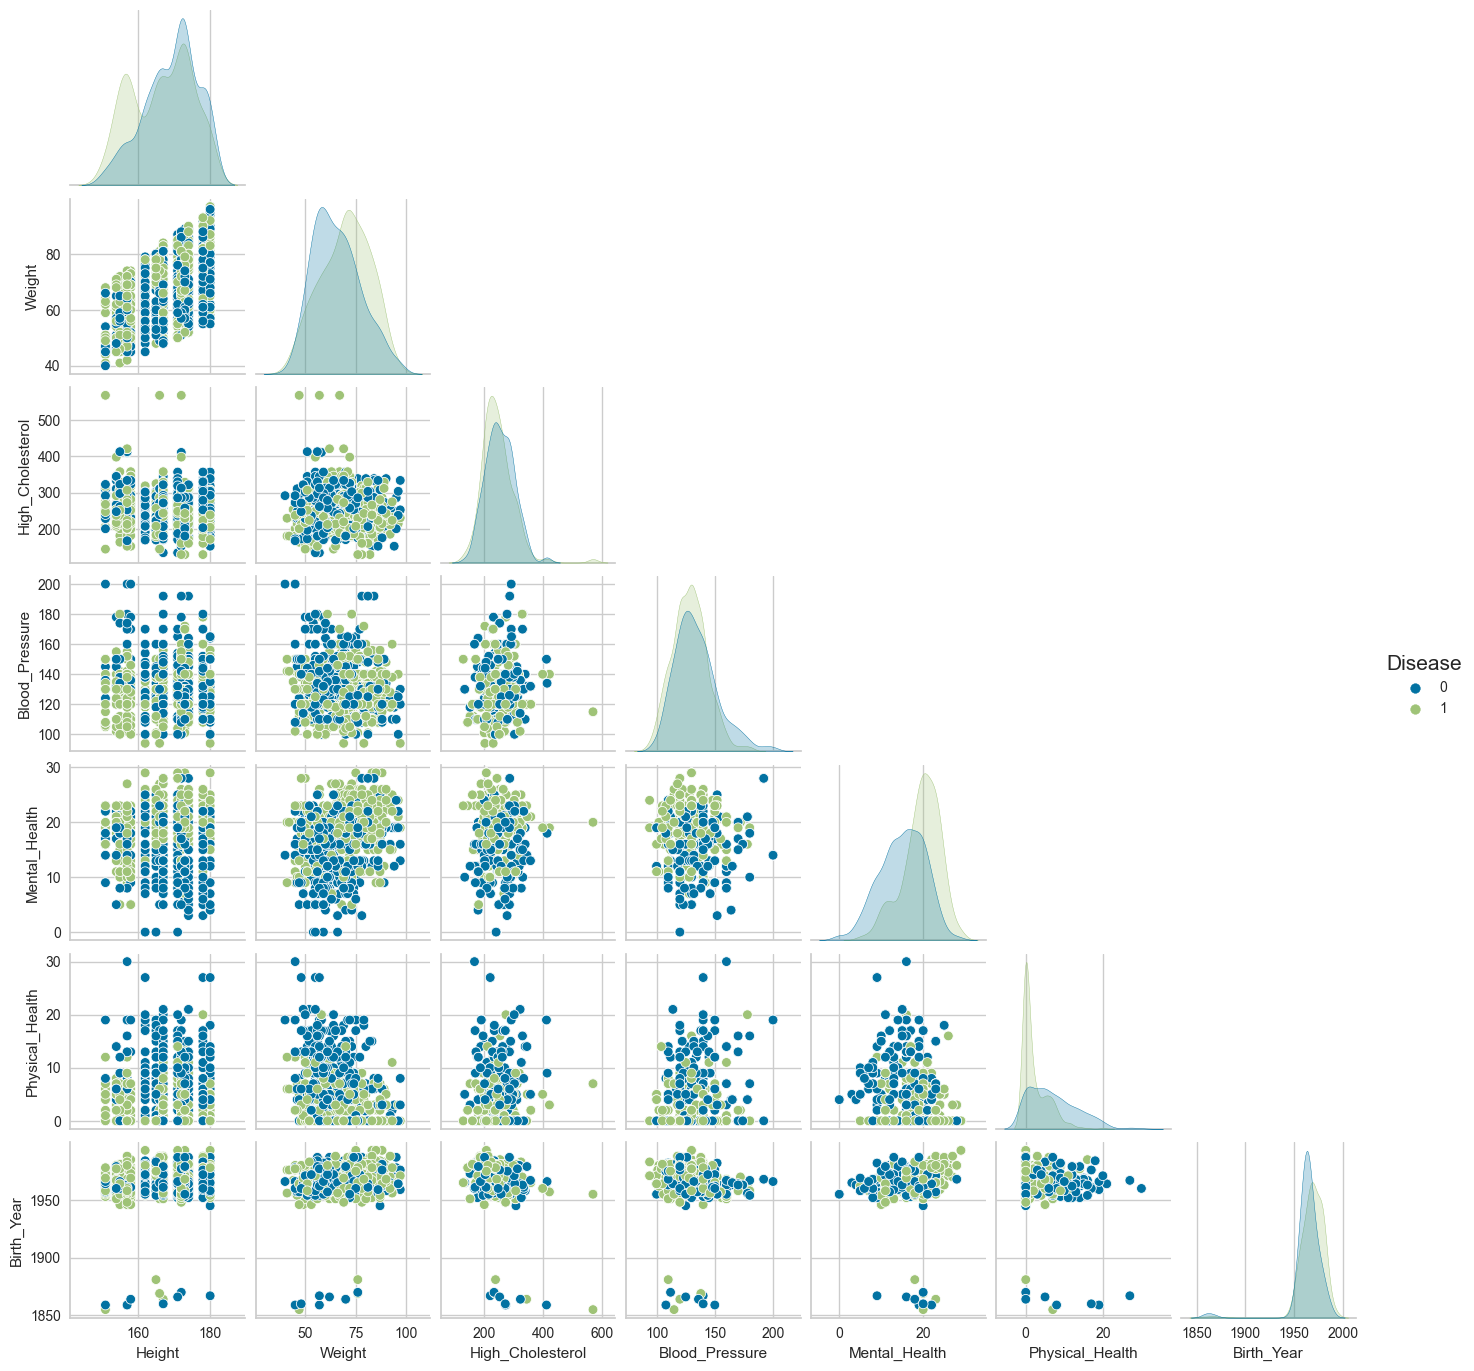

In [8]:
# Layout
plt.rcParams['font.size'] = '15'


# Plot
ax = sns.pairplot(train_data, diag_kind = 'kde', corner = True, hue = 'Disease', height = 2)

plt.show()

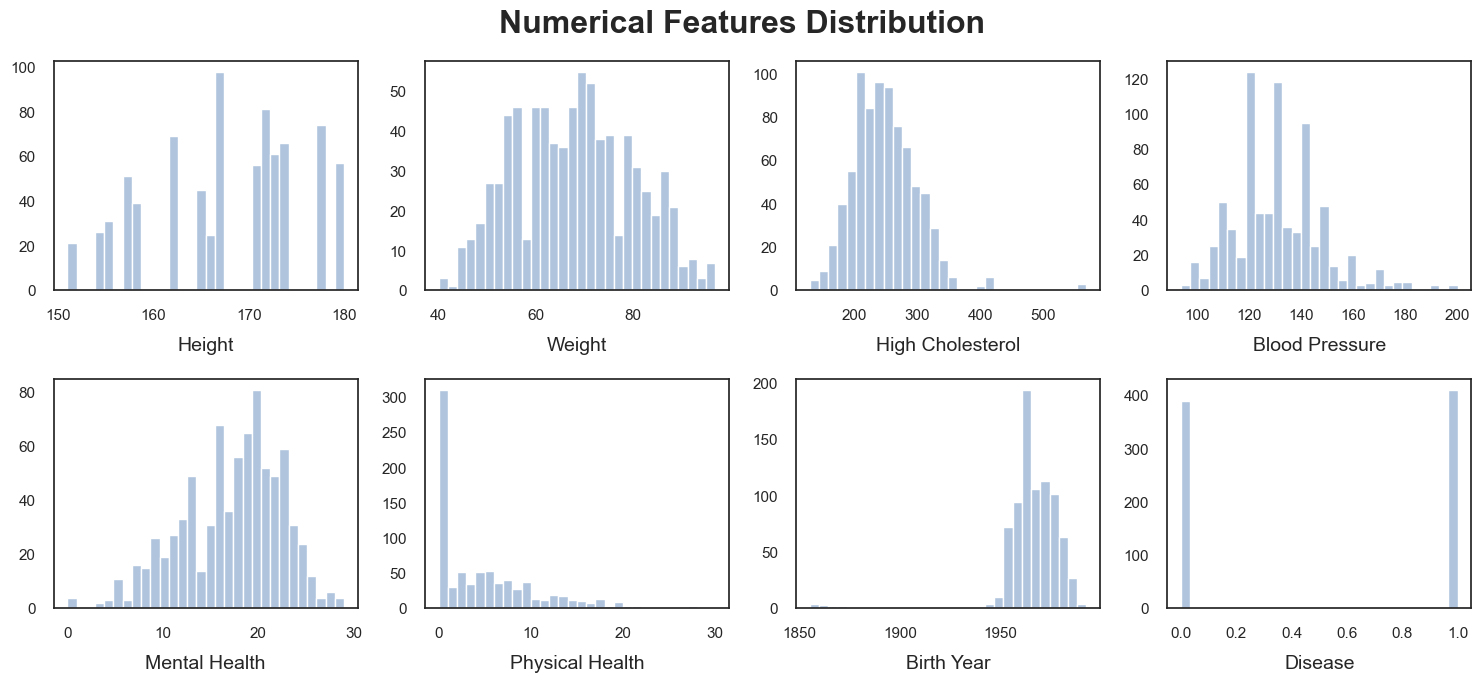

In [9]:
# All numeric features in one figure
sns.set_theme(style = 'white', palette = None)

# Selecting numeric features
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
        
# Plot
fig, axes = plt.subplots(nrows = 2, ncols = ceil(len(numerical)/2) , figsize = (15,7))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, col in zip(axes.flatten(), numerical): # Notice the zip() function and flatten() method
    ax.hist(train_data[col], bins=30, color = 'lightsteelblue')
    ax.set_title(col.replace('_', ' '), y = -.30, fontsize=14)
    
# Layout
plt.suptitle('Numerical Features Distribution', fontsize = 23, fontweight = 'bold')
plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.4, hspace = None) 

plt.tight_layout()

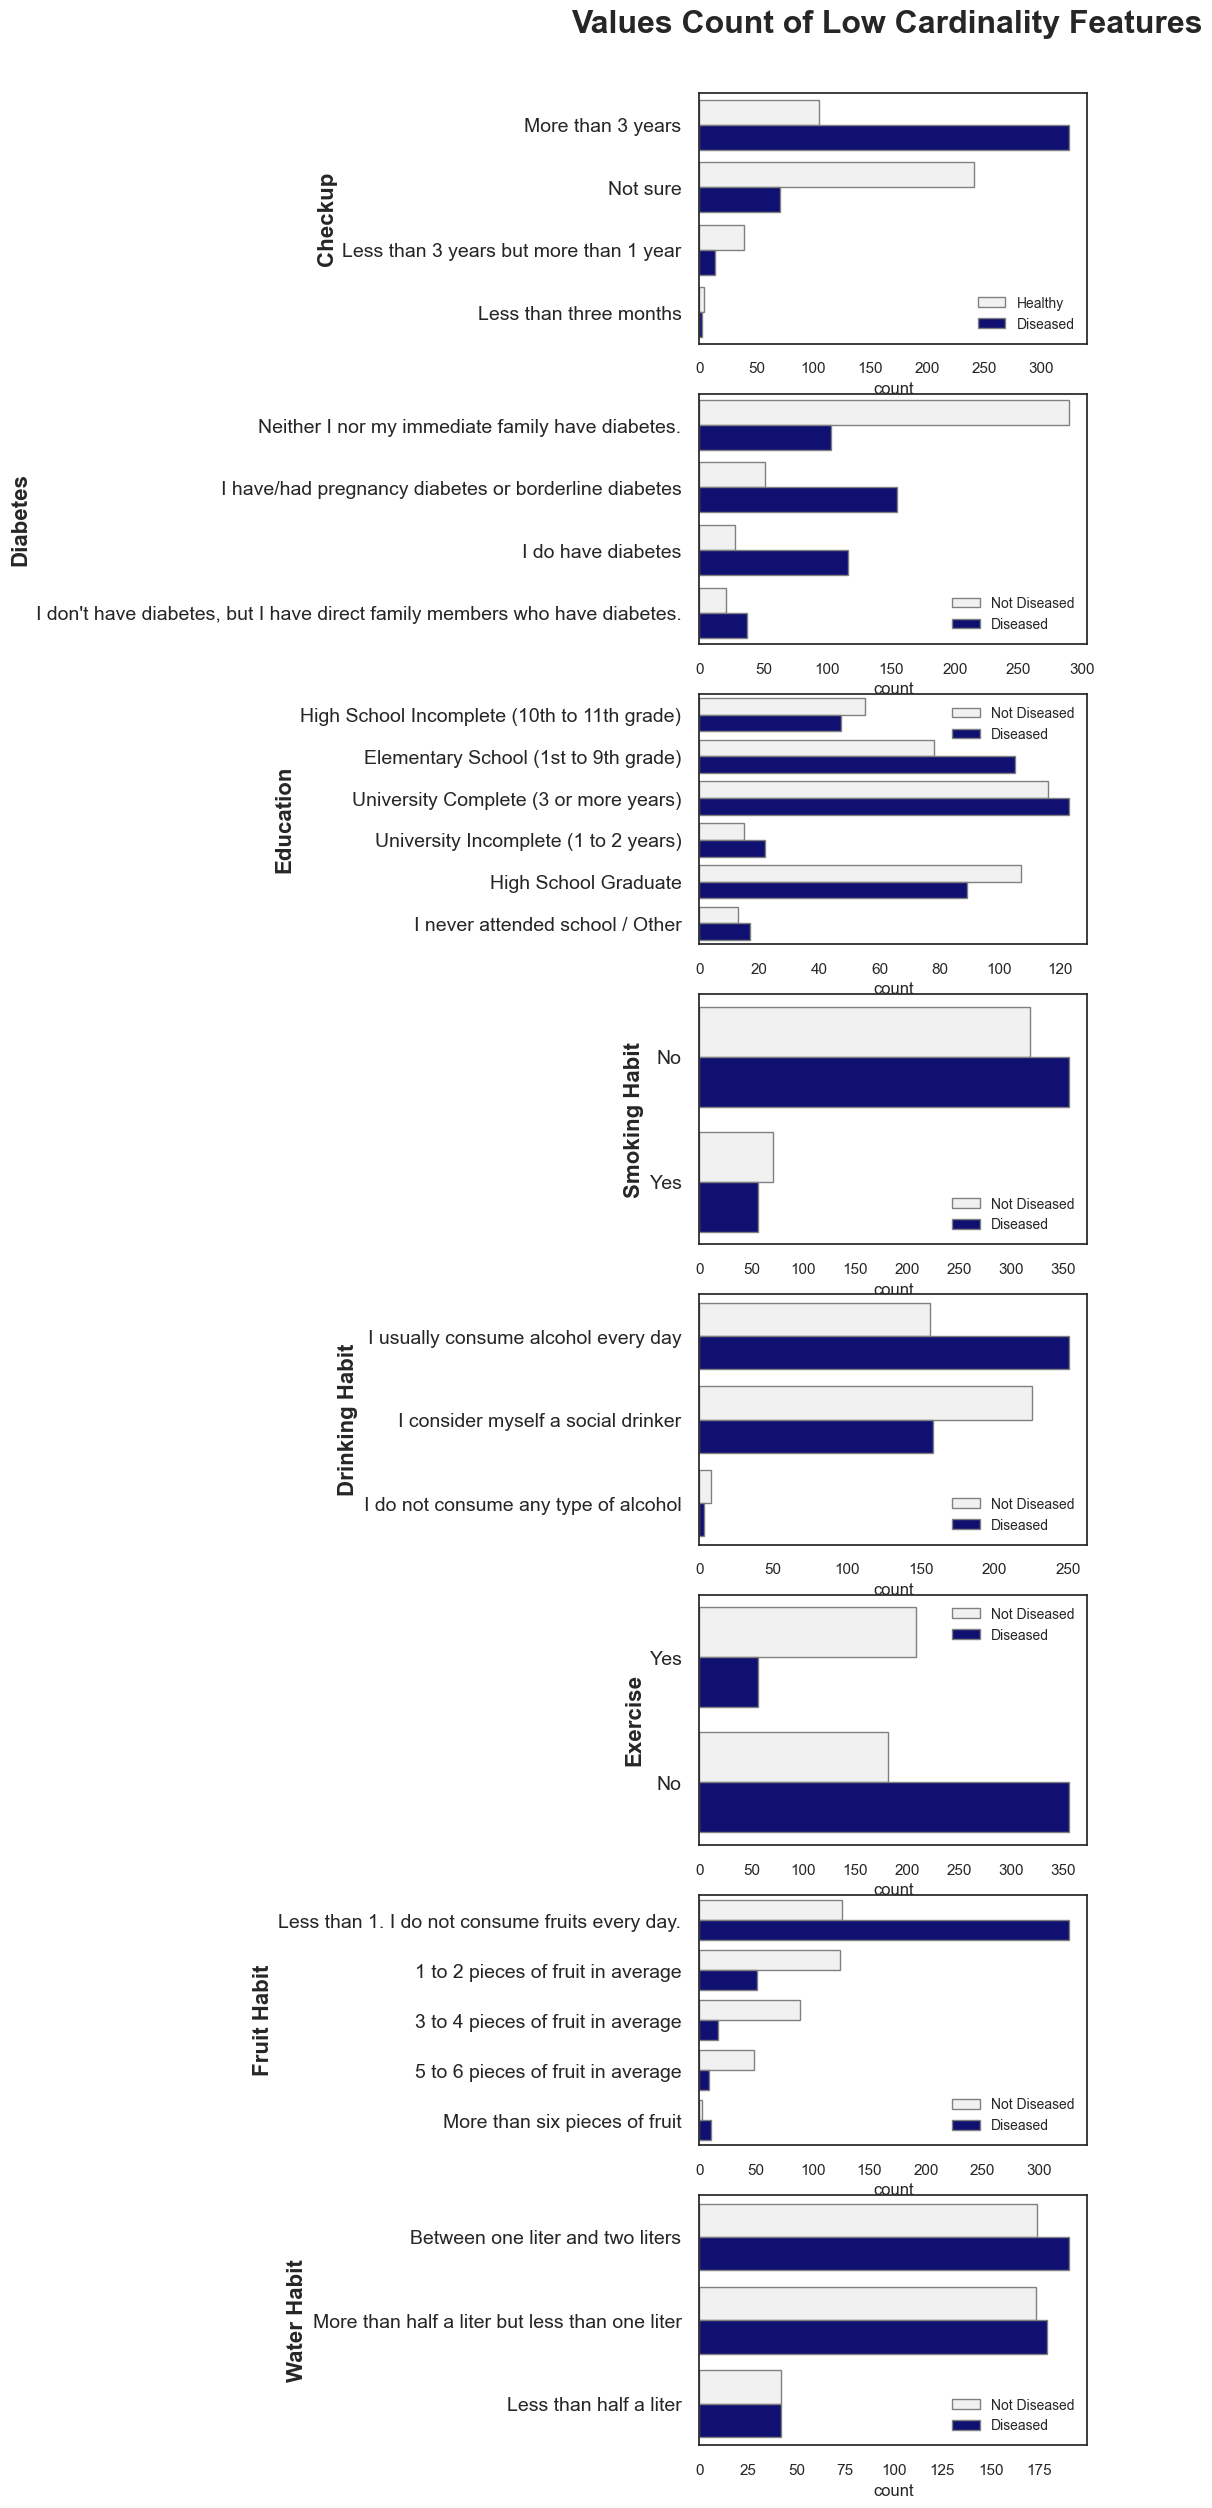

In [10]:
# Subseting object features 
categorical = train_data.select_dtypes(include = ['O'])

# Getting low cardinality features
categorical = [col for col, rows in categorical.items() if len(rows.value_counts()) <= 7]

# Plot
fig, ax = plt.subplots(len(categorical), 1, figsize = (5, len(categorical)*3.5)) 

for i in range(len(categorical)): 
    sns.countplot(data = train_data,
                  y = train_data[categorical[i]],
                  hue='Disease',
                  color='navy',
                  edgecolor='gray',
                  ax = ax[i])
    # Customize
    if i == 0:
        ax[i].legend(title='', loc='lower right', labels=['Healthy','Diseased'],  prop={'size': 10})
    else:
        ax[i].legend(title='', loc=0, labels=['Not Diseased','Diseased'],  prop={'size': 10})
    ax[i].set_ylabel(categorical[i].replace('_', ' '), fontsize=16, fontweight='bold')
    ax[i].tick_params(axis='y', labelsize=14)

    
# Layout
plt.suptitle('Values Count of Low Cardinality Features', fontsize = 23, fontweight = 'bold')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.4, hspace=None) 

plt.show()

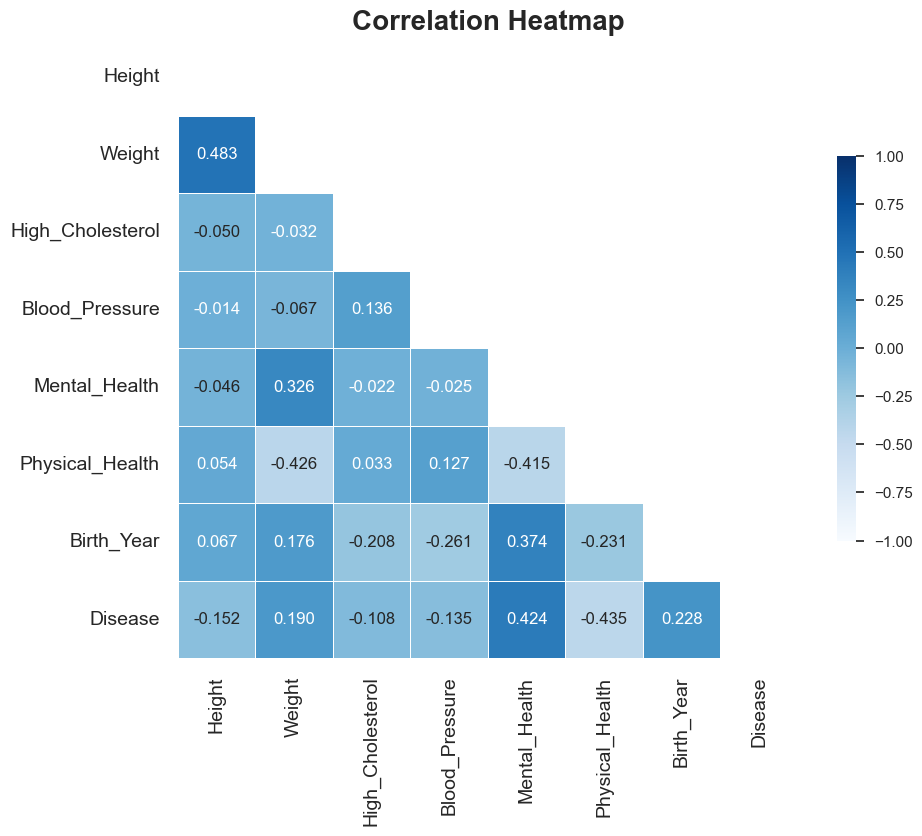

In [11]:
# Correlations analysis
# plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = train_data.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (10, 10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True, fmt = '.3f')

#customize
plt.title('Correlation Heatmap',fontsize = 20, fontweight = 'bold')


plt.show()

### <font color='SeaGreen'>4. Data Quality Verification</font>
#### <font color='SeaGreen'>4.2 Handling Duplicates and Missing Values</font>

In [12]:
# Checking for any duplicates
train_data.reset_index().duplicated().sum()

0

In [13]:

X = train_data.drop('Disease',axis=1)
y = train_data['Disease']

# Setting random state seeds
seed = 99

# Split the data, leaving 20% in the hold out sample 

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    random_state = seed,
                                                    test_size = .2,
                                                   )

In [14]:
X_train.isna().sum()
#The only NA are from education, one solution might be to create a new category as "No Education Information", for the 13 missing values

Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Name                 0
Birth_Year           0
Region               0
Education           11
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

In [15]:
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nEducation is categorical with the unique values:\n', X_train.Education.unique())
percentage = (X_train.isnull().sum()/X_train.shape[0]*100).round(1)
print('\nThe percentage of NAN values in each column is: \n',percentage)
# In proportion, Educantion has only 1.6 % of NA values. 
print('\nThe percentage of NAN values in Education is', percentage[4],',for this reason the NAN will be dropped.')

# The pros and cons associated to drop NAN values
# cons: drop causes loss of information and the analysis may be harmed due imbalance of categorical data.
# pros: is a simple way to eliminate NAN and should only be used when the incidence of NAN does not exceed 10%.
# X_train has only 1.7, for this reason the NAN will be dropped.

X_train2 = X_train.dropna(inplace = False, axis = 0)
print('\nThe percentage of NAN values in Education column after cleaning is', X_train2.isnull().sum()[4])

print('\nNumber of rows of X_train is', X_train.shape[0])
print('\nNumber of rows of X_train2, after cleaning NAN valeus is', X_train2.shape[0])


Education is categorical with the unique values:
 ['High School Graduate' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)'
 'Elementary School (1st to 9th grade)'
 'High School Incomplete (10th to 11th grade)' nan
 'I never attended school / Other']

The percentage of NAN values in each column is: 
 Height              0.0
Weight              0.0
High_Cholesterol    0.0
Blood_Pressure      0.0
Mental_Health       0.0
Physical_Health     0.0
Checkup             0.0
Diabetes            0.0
Name                0.0
Birth_Year          0.0
Region              0.0
Education           1.7
Smoking_Habit       0.0
Drinking_Habit      0.0
Exercise            0.0
Fruit_Habit         0.0
Water_Habit         0.0
dtype: float64

The percentage of NAN values in Education is 0.0 ,for this reason the NAN will be dropped.

The percentage of NAN values in Education column after cleaning is 0

Number of rows of X_train is 640

Number of rows of X_train2, after cleaning NAN 

In [16]:
# Daniel - "vejam se gostam desta funçao que deteta missing values" ANA

# Missing values reporter function
def missing_value_reporter(data, threshold=None):
    '''
    Returns pandas dataframe with feature's missing values count in absolute and relative frequency
    after a threshold is parsed (max % of column missing values), so it'll tell if the features are 
    above or bellow the desired missing threshold limit (True for above or False for bellow).
    
    If the threshold is not provided, it defaults to None.
     Args:
        data - input for data
        threshold - input for threshold variable from 0 to 1
        
    '''
    na_count = data.isna().sum() 
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

In [17]:
# threshold on 10%
missing_value_reporter(data = X_train, threshold = .1)

Feature  Nº of missings  % of missings  Above threshold
Education  Education              11           0.02            False

> * In order to preserve data, the missing values on the categorical feature __Education__ will be filled with its mode

In [18]:
# filling missing values with mode on train and test
X_train.fillna(X_train['Education'].mode()[0], inplace=True)
X_test.fillna(X_train['Education'].mode()[0], inplace=True) 

#### <font color='SeaGreen'>4.2 Handling Outliers</font>

> #### 4.2.1 Z-Score Approach

Z-score is a statistical measure that reveals how far is a data point from the rest of the dataset. In other words, Z-score shows how many standard deviations away a given observation is from the mean, denoted by __z__ and is calculated using the following formula: 
<p><p><p>$$\Large{{z}} = \frac{{(x-\overline{x})}}{s}$$

In [19]:
# Array with Z-scores from all observations of numerical features
Z = np.abs(stats.zscore(train_data[numerical]))

# Defining Z-score threshold accordind to the rule of thumb
threshold = 3.5 # the rule of thumb implies the use of 2, 2.5, 3 or 3.5 as threshold

# 2 arrays with the outliers respective row and column indices
positions = np.where(Z >= threshold) # gets values that are 3.5 standard deviation far from the mean
print('Outlier Position Arrays:\n\nRows:\n', positions[0], '\n\nColumns:\n', positions[1], '\n\n')

# High Z-score values count
columns = positions[1]
for col in np.unique(columns): 
    # getting column name & replacing underscore with space
    col_name = train_data[numerical].columns[col].replace('_', ' ') 
    occurrences = np.count_nonzero(columns == col) # getting number of outliers per column
    
    print(f'The {col_name} feature has {occurrences} observations with a Z-score higher or equal to 3.5\n') 

Outlier Position Arrays:

Rows:
 [ 18  22  35  61  93 198 312 312 460 493 503 511 566 566 585 588 593 617
 640 648 705 710 729 761 797] 

Columns:
 [6 2 3 6 6 6 2 6 5 6 3 5 5 6 3 5 6 3 6 6 6 3 2 3 6] 


The High Cholesterol feature has 3 observations with a Z-score higher or equal to 3.5

The Blood Pressure feature has 6 observations with a Z-score higher or equal to 3.5

The Physical Health feature has 4 observations with a Z-score higher or equal to 3.5

The Birth Year feature has 12 observations with a Z-score higher or equal to 3.5



In [20]:
def check_zscore_outliers(data, col):
    '''Checks values that Z-score test consider as outliers
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        
    Returns: 
        Print with outliers and respective index
    '''
    col_name = col.replace('_', ' ') # gets column name and replaces underscore with space
    tmp = data[col].reset_index() # reseting index because Z-score returns row position array with zero-based indexing
    
    # Z-scores from all observations in numerical features
    Z = np.abs(stats.zscore(tmp.drop(tmp.columns[0], axis=1))) # dropping Index column
    threshold = 3.5 # setting threshold according to thumb rule
    positions = np.where(Z >= threshold) # positions of identified outliers

    # Checking column range vs. outliers
    mini = data[col].min() 
    maxi = data[col].max() 
    print(f'The {col_name} feature ranges from {mini} to {maxi}\n\nOutlier values:\n')
    for row in positions[0]:
        print(f'Value from row {row}: ', tmp[col][row].round(2))

In [21]:
for col in np.unique(columns): 
    check_zscore_outliers(train_data, train_data[numerical].columns[col])
    print('\n')

The High Cholesterol feature ranges from 130 to 568

Outlier values:

Value from row 22:  568
Value from row 312:  568
Value from row 729:  568


The Blood Pressure feature ranges from 94 to 200

Outlier values:

Value from row 35:  200
Value from row 503:  200
Value from row 585:  192
Value from row 617:  192
Value from row 710:  192
Value from row 761:  200


The Physical Health feature ranges from 0 to 30

Outlier values:

Value from row 460:  27
Value from row 511:  27
Value from row 566:  27
Value from row 588:  30


The Birth Year feature ranges from 1855 to 1993

Outlier values:

Value from row 18:  1859
Value from row 61:  1859
Value from row 93:  1864
Value from row 198:  1881
Value from row 312:  1855
Value from row 493:  1859
Value from row 566:  1867
Value from row 593:  1869
Value from row 640:  1870
Value from row 648:  1866
Value from row 705:  1864
Value from row 797:  1860




> #### 4.2.2 IQR Method Approach

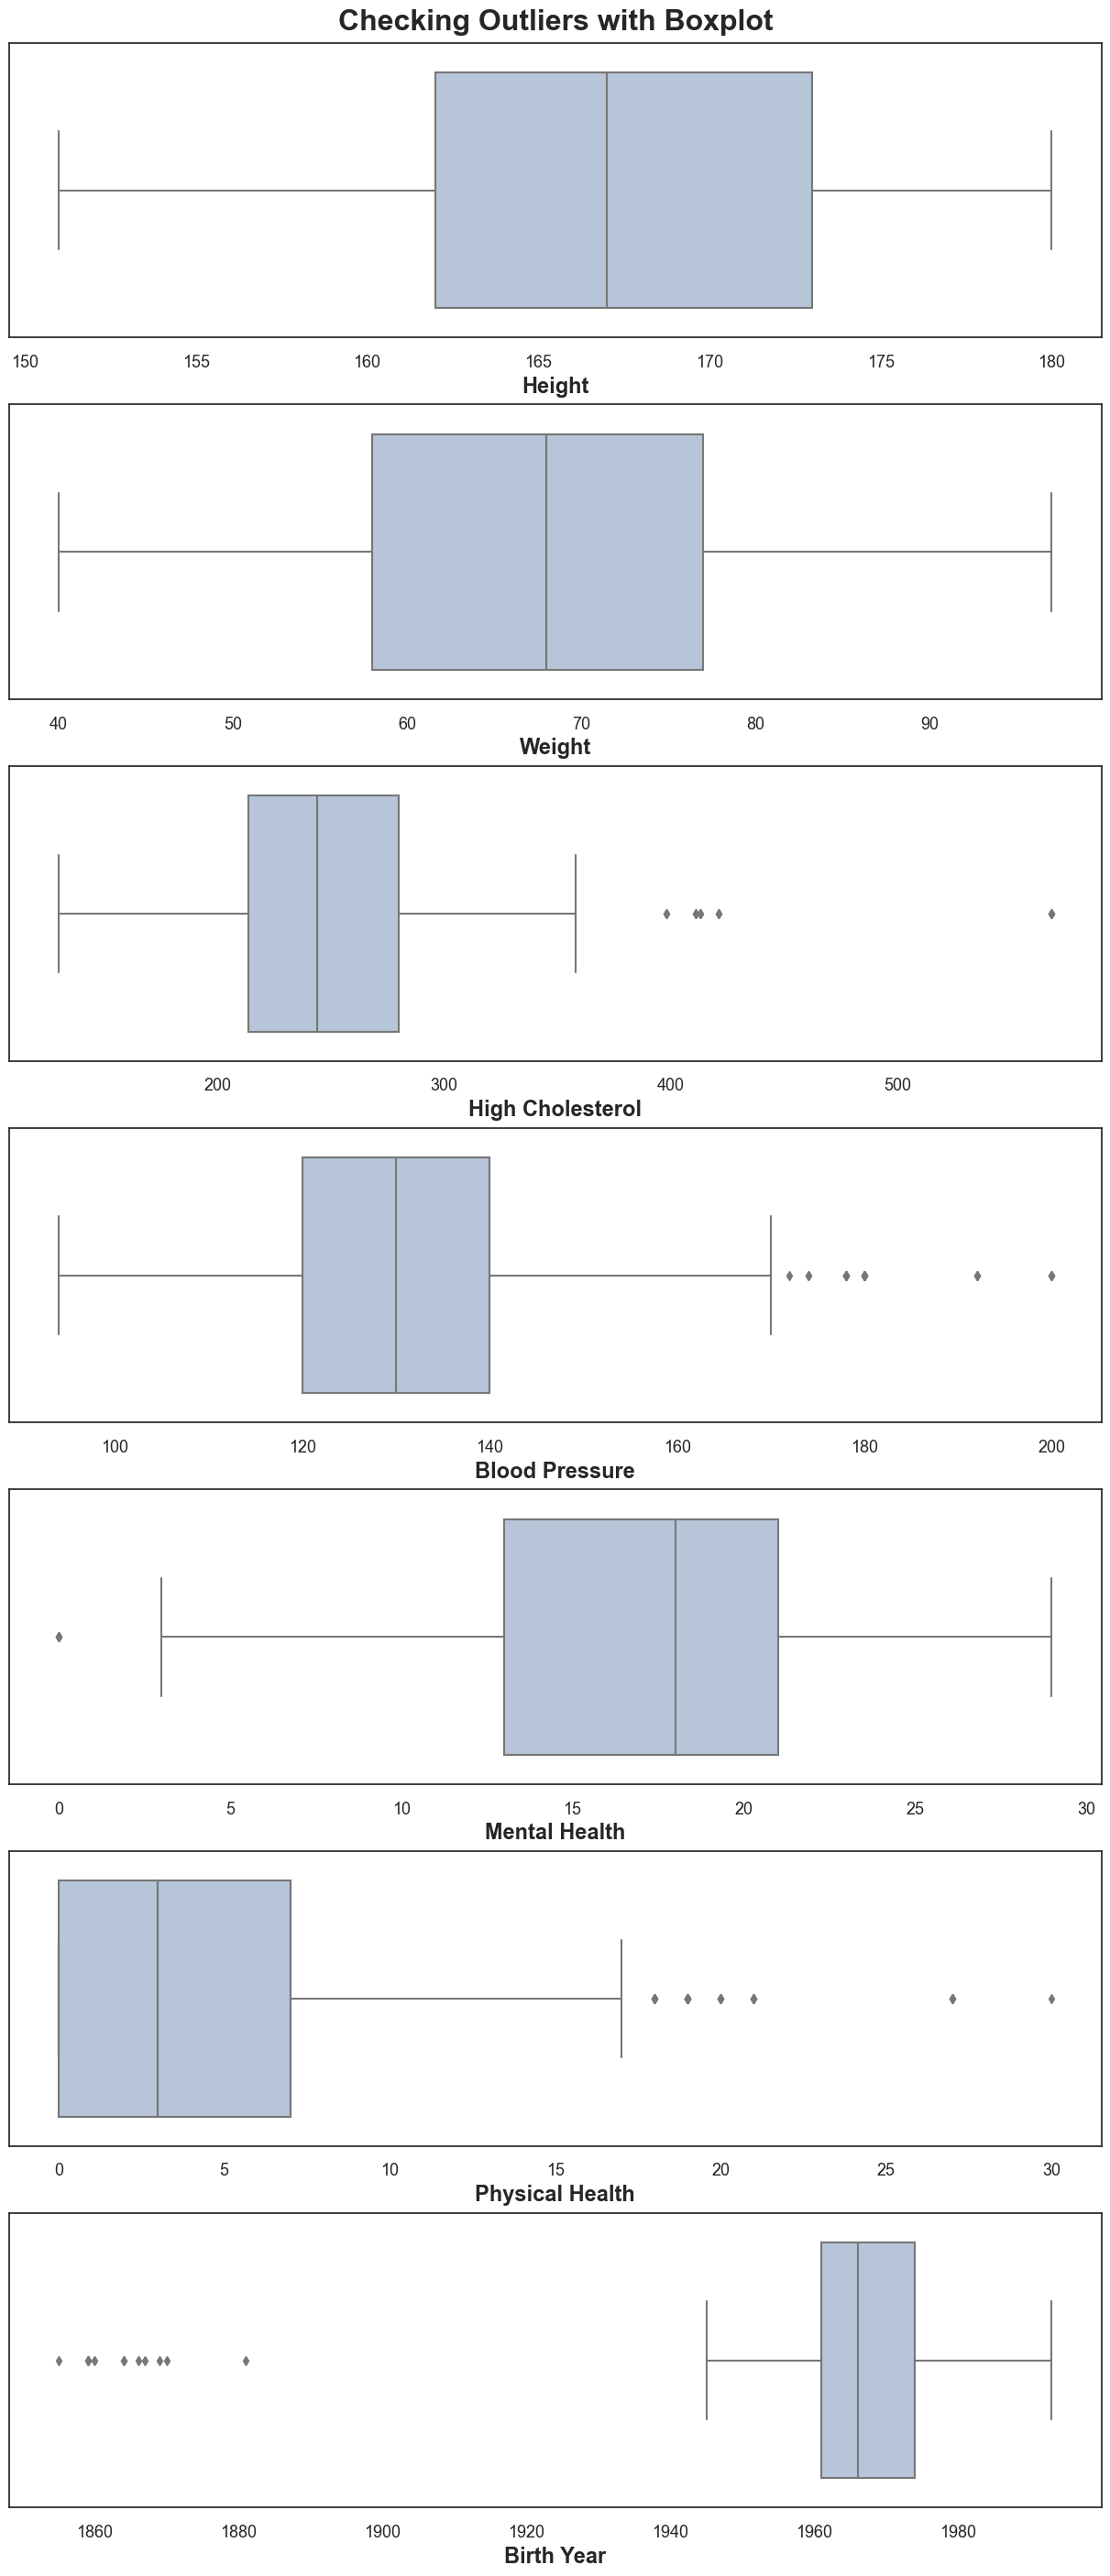

In [22]:
# Getting numerical data
nums = train_data[numerical] 

# Getting non-binary numerical data
for col, rows in nums.items(): 
    if rows.value_counts().shape[0] == 2:
        del nums[col]
        
# Plot
fig, ax = plt.subplots(nrows = nums.shape[1], ncols = 1,
                       figsize = (12, len(numerical)*3.5),
                       constrained_layout=True) 
        
for row in range(nums.shape[1]):
    sns.boxplot(x = nums.iloc[:,row], color = 'lightsteelblue', ax = ax[row])
    ax[row].set_xlabel(nums.columns[row].replace('_', ' '), fontsize = 17, fontweight = 'bold')
    ax[row].tick_params(axis = 'x', labelsize=13)
    
# Layout
plt.suptitle('Checking Outliers with Boxplot', fontsize = 23, fontweight = 'bold')
        
plt.show()

In [23]:
def check_IQR_outliers(data, col):
    '''Checks values that boxplots consider as outliers
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        
    Returns: 
        Print with outliers and respective index
        
    Note : 
        In a boxplot, an extreme value is considered to be an outlier if it\'s at least 1.5 interquartile 
        ranges below the first quartile, or at least 1.5 interquartile ranges above the third quartile
    '''
    col_name = col.replace('_', ' ') # gets column name and replaces underscore with space
    Q1 = data[col].quantile(.25) # value of first quartile
    Q3 = data[col].quantile(.75) # value of third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_lim = Q1 - 1.5 * IQR # setting min limit
    upper_lim = Q3 + 1.5 * IQR # setting max limit
    
    outliers = data.loc[(data[col] > upper_lim) | (data[col] < lower_lim)][col] # filtering data
    
    print(f'Outlier values in {col_name}:\n')
    for idx, val in outliers.items(): 
        print(f'Value from Patient {idx}: ', round(val,2)) # results

In [24]:
# Columns with outliers in boxplot 
IQR_cols = ['High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Birth_Year']

for col in IQR_cols: 
    check_IQR_outliers(train_data, col)
    print('\n')

Outlier values in High Cholesterol:

Value from Patient 1464:  568
Value from Patient 1481:  411
Value from Patient 1685:  411
Value from Patient 1255:  398
Value from Patient 1158:  568
Value from Patient 1996:  413
Value from Patient 1665:  421
Value from Patient 1123:  421
Value from Patient 1192:  568
Value from Patient 1179:  413
Value from Patient 1542:  398


Outlier values in Blood Pressure:

Value from Patient 1175:  200
Value from Patient 1944:  178
Value from Patient 1047:  178
Value from Patient 1528:  178
Value from Patient 1986:  180
Value from Patient 1452:  178
Value from Patient 1679:  180
Value from Patient 1891:  180
Value from Patient 1257:  180
Value from Patient 1971:  172
Value from Patient 1436:  174
Value from Patient 1294:  200
Value from Patient 1151:  192
Value from Patient 1229:  178
Value from Patient 1326:  192
Value from Patient 1396:  180
Value from Patient 1246:  192
Value from Patient 1636:  174
Value from Patient 1508:  200


Outlier values in Mental

### Feature Engineering

> ####  Train Data

In [25]:
for col in X_train.select_dtypes(object).columns: 
    print(X_train[col].value_counts(), '\n\n')

More than 3 years                         343
Not sure                                  249
Less than 3 years but more than 1 year     43
Less than three months                      5
Name: Checkup, dtype: int64 


Neither I nor my immediate family have diabetes.                              320
I have/had pregnancy diabetes or borderline diabetes                          163
I do have diabetes                                                            113
I don't have diabetes, but I have direct family members who have diabetes.     44
Name: Diabetes, dtype: int64 


Mr. Arthur Holden       1
Mrs. Bonnie Smoot       1
Mr. Bruce Shook         1
Mr. Matthew Williams    1
Mr. Brad Wolff          1
                       ..
Mr. Dana Arthur         1
Mrs. Helen Abrams       1
Mr. Larry Addington     1
Mr. Ronald Molina       1
Mr. Peter Kennedy       1
Name: Name, Length: 640, dtype: int64 


East Midlands               120
London                      110
South West                   87
We

In [26]:
# Applying data corrections
X_train['Region'].replace('LONDON', 'London', inplace = True)
X_test['Region'].replace('LONDON', 'London', inplace = True)

In [27]:
# Age column (increases readability)
X_train['Age'] = datetime.now().year - X_train['Birth_Year']
X_test['Age'] = datetime.now().year - X_test['Birth_Year']

# Body mass index column
X_train['BMI'] = round(X_train['Weight'] / X_train['Height'], 3)
X_test['BMI'] = round(X_test['Weight'] / X_test['Height'], 3)

In [28]:
# treating outliers
X_train = X_train.loc[train_data['Birth_Year']>1900]
X_test = X_test.loc[train_data['Birth_Year']>1900]

X_train = X_train.loc[train_data['High_Cholesterol']<500]
X_test = X_test.loc[train_data['High_Cholesterol']<500]

> ####  Test Data

In [29]:
# Checking data corrections
test_data['Region'].value_counts()

London                      50
East Midlands               32
East of England             31
West Midlands               30
South West                  22
South East                  22
Yorkshire and the Humber    16
North West                  13
North East                   9
Name: Region, dtype: int64

In [30]:
# Age column (increases readability)
test_data['Age'] = datetime.now().year - test_data['Birth_Year']

# Body mass index column
test_data['BMI'] = round(test_data['Weight'] / test_data['Height'], 2)

In [31]:
test_data.loc[test_data['Birth_Year']<1900]

Empty DataFrame
Columns: [Name, Birth_Year, Region, Education, Smoking_Habit, Drinking_Habit, Exercise, Fruit_Habit, Water_Habit, Height, Weight, High_Cholesterol, Blood_Pressure, Mental_Health, Physical_Health, Checkup, Diabetes, Age, BMI]
Index: []

In [32]:
test_data.loc[test_data['High_Cholesterol']>500]

Empty DataFrame
Columns: [Name, Birth_Year, Region, Education, Smoking_Habit, Drinking_Habit, Exercise, Fruit_Habit, Water_Habit, Height, Weight, High_Cholesterol, Blood_Pressure, Mental_Health, Physical_Health, Checkup, Diabetes, Age, BMI]
Index: []

### Feature Selection Study

> * Feature selection process is __one of the main components of a feature engineering process__. This is how a predictive model is developed by reducing the number of input variables. <p>
> * Feature selection techniques are employed to __reduce the number of input variables by eliminating redundant or irrelevant features__. It then narrows the set of features to those most relevant to the machine learning model. The feature selection objective in machine learning is to __indentify the most helpful group of variables that can be used to build useful models of the phenomena being studied__.<p>
> * In the machine learning process, feature selection is used to: <p>
>> 1. __Decrease over-fitting__  
>>>  Fewer redundant data means fewer chances of making decisions based on noise.
>> 2. __Improve Accuracy__  
>>>  Less misleading data means better modeling accuracy.
>> 3. __Reduce Training Time__  
>>>  Less data means quicker algorithms.
> * Feature selection techniques can be divided into two types: <p>
>> * __Supervised__ and __Unsupervised__
> * But since __Supervised feature selection algorithms are always superior to Semi-Supervised and Unsupervised algorithms in selecting powerful feature subsets due to its using the labels of samples, only this type of technique will be explored.__ <p>
> * There are three types __Supervised methods__:
>> 1 - __Wrapper Methods__ 
    >>> 
>> 2 - __Filter Methods__ <p>
>> 3 - __Embedded Methods__ 

### CHI-SQUARE

In [36]:
def TestIndependence(X, y, var, alpha = .05): 
    '''
    '''
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p < alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)
    
for var in X_train.select_dtypes(object):
    TestIndependence(X_train[var], y_train, var)

Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is IMPORTANT for Prediction
Drinking_Habit is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)


### Categorical Data

| __Predictor__ | __Chi-Square__ | 
| --- | --- | 
| Checkup | Keep |  
| Diabetes | Keep | 
| Name | Discard|
| Region | Discard | 
| Education | Discard | 
| Smoking_Habit | Keep |
| Drinking_Habit | Keep |
| Exercise | Keep |
| Fruit_Habit | Keep |
| Water_Habit | Discard |

<hr>

In [37]:
X_train.drop(['Name', 'Region', 'Education', 'Water_Habit'], axis=1, inplace=True)
X_test.drop(['Name', 'Region', 'Education', 'Water_Habit'], axis=1, inplace=True)

In [40]:
# filtering test data with train data columns 
test_data = test_data[X_train.columns]

# splitting important non-metric features (categorical) from metric (numerical) 
categorical = X_train.select_dtypes(object)

# Change categorical variables into numeric representation
X_train = pd.get_dummies(X_train, columns = categorical)

X_test = pd.get_dummies(X_test, columns = categorical)

test_data = pd.get_dummies(test_data, columns = categorical)

# Change Yes and No to 1 and 0s
X_train['Exercise'] = X_train['Exercise'].map({'Yes': 1, 'No': 0})
X_train['Smoking_Habit'] = X_train['Smoking_Habit'].map({'Yes': 1, 'No': 0})

X_test['Exercise'] = X_test['Exercise'].map({'Yes': 1, 'No': 0})
X_test['Smoking_Habit'] = X_test['Smoking_Habit'].map({'Yes': 1, 'No': 0})

test_data['Exercise'] = test_data['Exercise'].map({'Yes': 1, 'No': 0})
test_data['Smoking_Habit'] = test_data['Smoking_Habit'].map({'Yes': 1, 'No': 0})

In [ ]:
### NUMERICAL DATA SELECTION

In [ ]:
### FINAL SELECTION

In [ ]:
# Plotting feature importance

def plot_feature_importances(model, data):
    ''' 
    '''
    n_features = data.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.title('Feature Importance Plot',fontsize=24, fontweight='bold')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel('Feature importance', fontsize=18) 
    plt.ylabel('Feature') 
    plt.axvline(x=0.02, color = 'lightblue') 
    plt.axvline(x=0.04, color = 'g') 
    plt.show()
     
plot_feature_importances(entropy_importance, X)

In [ ]:
# Creating dataset with features with importance above .04 (green line in plot above)
def df_feature_importances(model, data):
    col_names = []
    col_importance = []
    for idx, col in enumerate(data): 
        col_names.append(col)
        col_importance.append(model.feature_importances_[idx])
    ft_importance_df=pd.DataFrame({'Features' : col_names, 'Importance' : col_importance})
    ft_importance_df=ft_importance_df.sort_values('Importance',ascending = False)
    ft_importance_df=ft_importance_df.loc[ft_importance_df.Importance > .02].reset_index().drop('index',axis=1)
    return ft_importance_df

df_feature_importances(entropy_importance, X).style

In [ ]:
# FILTERING important columns
important_cols = df_feature_importances(entropy_importance,X)['Features'].values

X_train = X_train[important_cols]

X_test = X_test[important_cols]

test_data =test_data[important_cols]

In [ ]:
# Checking multicollinearity before modeling

# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = X_train.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (25, 20))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True, fmt = '.2f', 
           annot_kws={'size':25})

#customize
plt.title('Correlation Heatmap',fontsize = 35, fontweight = 'bold')


plt.show()

### Evaluation Functions

In [ ]:
def evaluate_model(model, X, y):
    '''
    '''
    kf = StratifiedShuffleSplit(n_splits=10, random_state=seed)
    score_train = []
    score_test = []
    timer = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        begin = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        
        # Appends the accuracy, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end - begin)
        
    # Calculate the average and the std for each measure 
    # (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time),\
           str(avg_train) + '+/-' + str(std_train),\
           str(avg_test) + '+/-' + str(std_test)

In [ ]:
def performance_metrics(y_Train,
                        y_PredTrain,
                        y_Test,
                        y_PredTest):
    '''
    Creates Dataframe with the main benchmark metrics for Classfication models
    
    Args: 
        y_Train -      Series with target values used to train model
        y_PredTrain -  Series with predicted values from y_Train
        y_Test -       Series with test values used to validate model
        y_PredTest -   Series with predicted values from y_Test
        
    Returns: 
        pandas.core.frame.DataFrame
    '''
    # Columns
    measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
    
    # Results for train data
    train_results = [
                round(metrics.accuracy_score(y_Train, y_PredTrain),3),  # Calculating accuracy
                round(metrics.precision_score(y_Train, y_PredTrain),3),  # Calculating precision
                round(metrics.recall_score(y_Train, y_PredTrain),3),  # Calculating recall
                round(metrics.f1_score(y_Train, y_PredTrain),3),  # Calculating f1 score
                round(metrics.roc_auc_score(y_Train, y_PredTrain),3)  # Calculating ROC area under the curve
                ]
    # Results for test data
    test_results = [
               round(metrics.accuracy_score(y_Test, y_PredTest),3),  # Calculating accuracy
               round(metrics.precision_score(y_Test, y_PredTest),3),  # Calculating precision
               round(metrics.recall_score(y_Test, y_PredTest),3),  # Calculating recall
               round(metrics.f1_score(y_Test, y_PredTest),3),  # Calculating f1 score
               round(metrics.roc_auc_score(y_Test, y_PredTest),3)  # Calculating ROC area under the curve
               ]
    
    results = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})
    
    # Comparison column
    results['Difference'] = round(results['Train'] - results['Test'], 2) 
    
    return results

In [ ]:
# Function to plot confusion matrix
# Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

def make_confusion_matrix(cf,
                          group_names = None,
                          categories ='auto',
                          count = True,
                          percent = True,
                          cbar = True,
                          xyticks = True,
                          xyplotlabels = True,
                          sum_stats = True,
                          figsize = None,
                          cmap = 'Blues',
                          title = None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    
    Args: 
        cf -           Confusion matrix to be passed in
        group_names -  List of strings that represent the labels row by row to be shown in each square
        categories -   List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
        count -        If True, show the raw number in the confusion matrix. Default is True
        normalize -    If True, show the proportions for each category. Default is True
        cbar -         If True, show the color bar. The cbar values are based off the values in the confusion matrix
                       Default is True
        xyticks -      If True, show x and y ticks. Default is True
        xyplotlabels - If True, show 'True Label' and 'Predicted Label' on the figure. Default is True
        sum_stats -    If True, display summary statistics below the figure. Default is True
        figsize -      Tuple representing the figure size. Default will be the matplotlib rcParams value
        cmap -         Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
        title -        Title for the heatmap. Default is None
        
    Returns: 
        Confusion Matrix Plot
    '''
    # Generating text inside each matrix square
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ['{}\n'.format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


        # Generating summary statistics & text for summary stats
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
    else:
        stats_text = ''


    # Setting figure parameters according to other arguments
    if figsize == None:
        # Gets default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Doesn't show categories if xyticks is False
        categories = False

    # Making the heatmap vizualization
    plt.figure(figsize = figsize)
    ax = sns.heatmap(cf, 
                     annot = box_labels, fmt = '',
                     cmap = cmap, cbar = cbar,
                     xticklabels = categories,
                     yticklabels = categories)

    if xyplotlabels:
        plt.ylabel('True label', fontsize = 14)
        plt.xlabel('Predicted label' + stats_text, fontsize = 14)
    else:
        plt.xlabel(stats_text, fontsize = 14)
    
    if title:
        plt.title(title)

### Models

> ### Decision Tree

A Decision Tree is a model composed of a collection of questions organized hierarchically in the shape of a tree, usually represented with the root (the first node) at the top.<br><br> The questions are usually called a condition, a split, or a test. Each non-leaf node contains a condition, and each leaf node contains a prediction.

<img align='center' width='500' height='500' src='https://developers.google.com/static/machine-learning/decision-forests/images/DecisionTree.png'>

> * Hyper-tuning results (using GridSearch): <p>
>> * Grid search best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'} <p>
>> * Grid search best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [ ]:
# Setting models seed
seed = 0

# Creating DT Model
DTmodel = DecisionTreeClassifier(class_weight = None,
                                 criterion = 'entropy',
                                 max_depth = 50,
                                 min_samples_split = 2,
                                 splitter = 'best',
                                 random_state = seed)

DTmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = DTmodel.predict(X_test)
y_pred_train = DTmodel.predict(X_train)

# Getting model scores
value_train = round(DTmodel.score(X_train, y_train), 3)
value_test = round(DTmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Layout (only needs to be defined once)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not Diseased', 'Diseased']

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Random Forest

We can define the Random Forest Classifier as set of Decision Trees.



Grid search best parameters: {'criterion': 'entropy'} 

Grid search best parameters: RandomForestClassifier(criterion='entropy')

Grid search best parameters: {'bootstrap': True, 'max_depth': 10, 'oob_score': True, 'warm_start': True} 

Grid search best parameters: RandomForestClassifier(criterion='entropy', max_depth=10, oob_score=True,
                       warm_start=True)
                       
Grid search best parameters: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} 

Grid search best parameters: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, oob_score=True, warm_start=True)

In [ ]:
# Creating RF Model full grid
RFmodel = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 20,
                                 bootstrap = True,
                                 oob_score = True,
                                 warm_start = True,
                                 max_features = 'sqrt',
                                 class_weight = 'balanced_subsample',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 random_state = seed
                                 )

RFmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = RFmodel.predict(X_test)
y_pred_train = RFmodel.predict(X_train)

# Getting model scores
value_train = round(RFmodel.score(X_train, y_train), 3)
value_test = round(RFmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### AdaBoost Classifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier that combines multiple classifiers to increase the accuracy of classifiers and can be used for both classification and regression problems.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

In [ ]:
ADAmodel = AdaBoostClassifier(n_estimators = 150,
                              base_estimator = DTmodel,
                              algorithm = 'SAMME',
                              learning_rate = .1,
                              random_state = seed)

ADAmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = ADAmodel.predict(X_test)
y_pred_train = ADAmodel.predict(X_train)

# Getting model scores
value_train = round(ADAmodel.score(X_train, y_train), 3)
value_test = round(ADAmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.



Grid search best parameters: {'learning_rate': 1, 'max_features': 1, 'n_estimators': 200} 

Grid search best parameters: GradientBoostingClassifier(learning_rate=1, max_features=1, n_estimators=200)

In [ ]:
# Creating GBC Model #99
GBCmodel = GradientBoostingClassifier(n_estimators = 200,
                                      warm_start = True,
                                      max_features = 5,
                                      learning_rate = 1,
                                      max_depth = 10, 
                                      min_samples_split = .1,
                                      min_samples_leaf = .01,
                                      tol = 1e-10,
                                      random_state = seed) 

GBCmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = GBCmodel.predict(X_test)
y_pred_train = GBCmodel.predict(X_train)

# Getting model scores
value_train = round(GBCmodel.score(X_train, y_train), 3)
value_test = round(GBCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
# Creating XGB Model
#booster: Specify which booster to use: gbtree or dart gblinear
# tree_method: approx', 'auto', 'exact', 'gpu_hist', 'hist'
XGBmodel = XGBClassifier(n_estimators = 300,
                         booster = 'gbtree',
                         tree_method = 'exact',
                         max_depth = 10,
                         learning_rate = .1,
                         eta = .01,
                         #gamma = 1e-10,
                         #sampling_method = 'gradient_based',
                         random_state = seed) 

XGBmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = XGBmodel.predict(X_test)
y_pred_train = XGBmodel.predict(X_train)

# Getting model scores
value_train = round(XGBmodel.score(X_train, y_train), 3)
value_test = round(XGBmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Extremely Randomized Trees Classifier

Extremely Randomized Trees Classifier is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [ ]:
ETCmodel = ExtraTreesClassifier(criterion = 'entropy',
                                max_depth = 150,
                                min_samples_split = 2,
                                max_features = 'auto',
                                bootstrap = False,
                                oob_score = False,
                                warm_start = False,
                                class_weight = 'balanced',
                                min_samples_leaf = 1,
                                random_state=seed).fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = ETCmodel.predict(X_test)
y_pred_train = ETCmodel.predict(X_train)

# Getting model scores
value_train = round(ETCmodel.score(X_train, y_train), 3)
value_test = round(ETCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Normalization Study

#### MLPClassifier before scalling

In [ ]:
classifier = MLPClassifier().fit(X_train, y_train)

classifier.score(X_test, y_test)

In [ ]:
min_max = MinMaxScaler().fit(X_train)
min_max_X_train = min_max.transform(X_train)
min_max_X_test = min_max.transform(X_test)
model_min_max = MLPClassifier().fit(min_max_X_train, y_train)
model_min_max.score(min_max_X_test, y_test)

In [ ]:
min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_X_test = min_max2.transform(X_test)
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
model_min_max2.score(min_max2_X_test, y_test)

In [ ]:
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_test = robust.transform(X_test)
model_robust = MLPClassifier().fit(robust_X_train, y_train)
model_robust.score(robust_X_test, y_test)

In [ ]:
x = ['Raw','MinMax[0,1]','MinMax[-1,1]','Robust']
y = [classifier.score(X_test, y_test),
     model_min_max.score(min_max_X_test, y_test), 
     model_min_max2.score(min_max2_X_test, y_test),
     model_robust.score(robust_X_test, y_test)]

# Plot
plt.figure(figsize = (8,6))
sns.barplot(x, y,palette='Blues')

# Layout
plt.title('Scalling Results', fontsize = 18, fontweight='bold')
plt.xticks(fontsize = 13)

plt.show()

__Conclusions:__

> * __From the diferent scalling techniques, the MinMax [0, 1] Scaler had the better score by a slight margin. It'll be the one used moving forward.__

In [ ]:
# Normalizing data
train_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_train)
test_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_test)

X_train[X_train.columns] = train_scaler
X_test[X_test.columns] = test_scaler

> ### Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. 

For the this model, only the most important features will be used


Grid search best parameters: {'C': 10.0, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'} 

Grid search best estimators: LogisticRegression(C=10.0, max_iter=10)

LogisticRegression(C=10, dual=True, fit_intercept=False, max_iter=200,
                   random_state=15, solver='liblinear')

In [ ]:
# Creating LR Model
LRmodel = LogisticRegression(max_iter = 200,
                             solver = 'liblinear',
                             C = 10, 
                             penalty = 'l2',
                             dual = True,
                             fit_intercept = False,
                             multi_class = 'auto',
                             class_weight = None,
                             random_state = seed)

LRmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = LRmodel.predict(X_test)
y_pred_train = LRmodel.predict(X_train)

# Getting model scores
value_train = round(LRmodel.score(X_train, y_train), 3)
value_test = round(LRmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [ ]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(LRmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = LRmodel.predict(X_test)
y_pred_train = LRmodel.predict(X_train)

# Getting new scores
value_train = round(LRmodel.score(X_train, y_train), 3)
value_test = round(LRmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### K-Nearest Neighbor

The K-Nearest neighbors algorithm, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.


Grid search best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} 

Grid search best parameters: KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [ ]:
# Creating KN Model
KNmodel = KNeighborsClassifier(n_neighbors = 1,
                               leaf_size = 1,
                               p = 1,
                               weights = 'uniform',
                               algorithm = 'auto')

KNmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = KNmodel.predict(X_test)
y_pred_train = KNmodel.predict(X_train)

# Getting model scores
value_train = round(KNmodel.score(X_train, y_train), 3)
value_test = round(KNmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [ ]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(KNmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = KNmodel.predict(X_test)
y_pred_train = KNmodel.predict(X_train)

# Getting new scores
value_train = round(KNmodel.score(X_train, y_train), 3)
value_test = round(KNmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
bagging = BaggingClassifier(KNmodel,
                            n_estimators=5).fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = bagging.predict(X_test)
y_pred_train = bagging.predict(X_train)

# Getting model scores
value_train = round(bagging.score(X_train, y_train), 3)
value_test = round(bagging.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Neural Network

A Neural Network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, Neural Networks refer to systems of neurons, either organic or artificial in nature.

In [ ]:
# Creating NN Model
NNmodel = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 120, 
                        learning_rate = 'adaptive', 
                        learning_rate_init = .0505, 
                        solver = 'adam',
                        power_t = 1e-10,
                        max_iter = 500,
                        n_iter_no_change=1000,
                        random_state = seed)

NNmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = NNmodel.predict(X_test)
y_pred_train = NNmodel.predict(X_train)

# Getting model scores
value_train = round(NNmodel.score(X_train, y_train), 3)
value_test = round(NNmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

### Model Selection

### Deployment 

In [ ]:
RFmodel.predict(test_data)

In [ ]:
final_data = pd.DataFrame()
final_data['PatientID'] = test_data.reset_index()['PatientID']
final_data['Disease'] = RFmodel.predict(test_data)

final_data.to_csv(os.path.join(path, 'final.csv'))

### Conclusions